1. Load the dataset

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load data
df = pd.read_csv("BostonHousing.csv")

#disply head
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


2. Explore the data structure, types, and summary statistics

In [18]:
# Check basic info about the dataset
df.info()

# Check summary statistics of numerical features
df.describe()

# Check summary of categorical features
df.describe()

# Check for unique values in categorical columns
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

3. Visualize relationships between features and the target variable

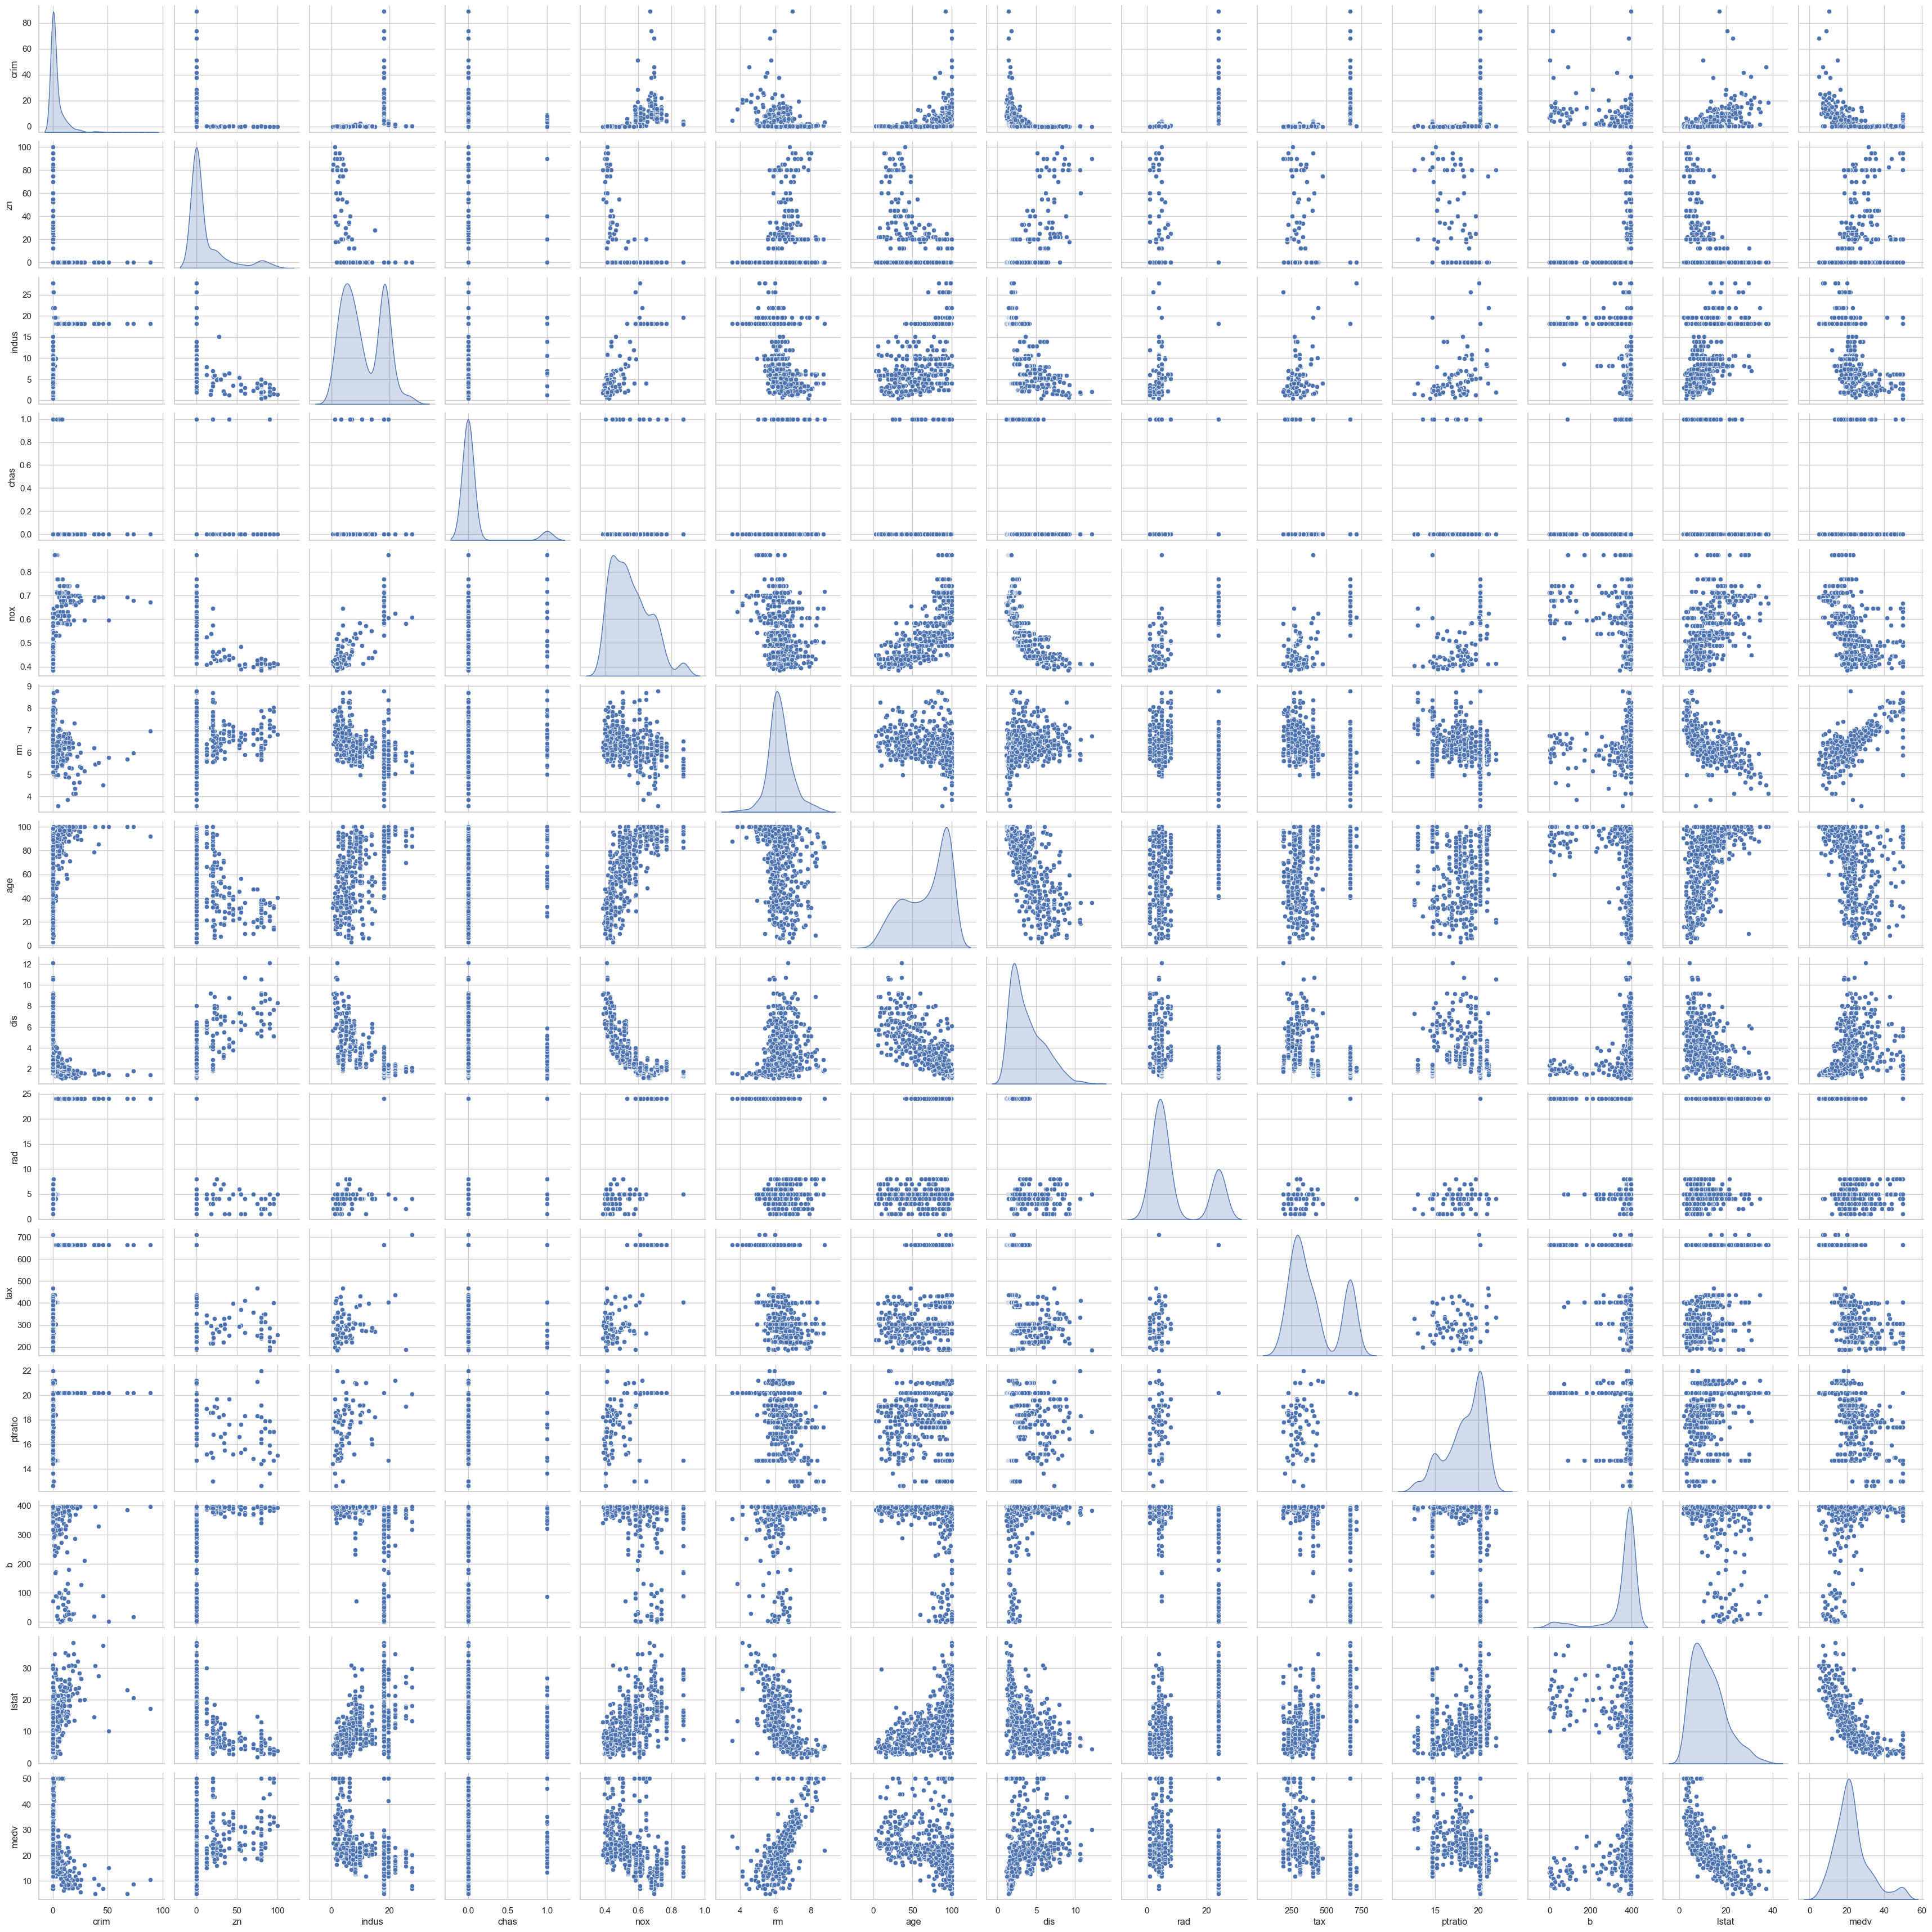

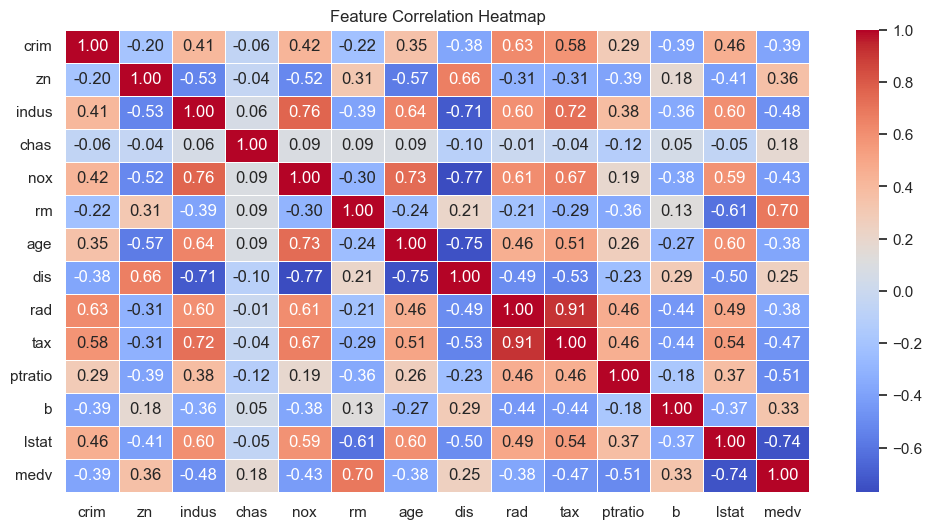

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Pairplot for numerical features (use hue for categorical target variable if applicable)
sns.pairplot(df, diag_kind="kde")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Box plots for categorical features against the target variable
categorical_columns = df.select_dtypes(include=['object']).columns
target_variable = "your_target_column"  # Replace with actual target column name

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], y=df[target_variable])
    plt.xticks(rotation=45)
    plt.title(f"{col} vs {target_variable}")
    plt.show()


4. Identify missing values and outliers

In [22]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("No missing values found!")




No missing values found!


 Data Preprocessing

1. Handle Missing Values and Outliers

In [24]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, columns, threshold=1.5):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply to numerical features
numerical_columns = df.select_dtypes(include=['number']).columns
df_clean = remove_outliers_iqr(df, numerical_columns)

print(f"Original Shape: {df.shape}, Cleaned Shape: {df_clean.shape}")


Original Shape: (506, 14), Cleaned Shape: (214, 14)


2. Encode Categorical Variables

In [31]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder with the correct parameter
encoder = OneHotEncoder(sparse_output=False, drop="first")

# Apply encoding to categorical column (if needed)
encoded_cols = encoder.fit_transform(df[['chas_1']])  # Replace with actual categorical columns

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['chas_1']))

# Merge with the original dataset and drop old categorical column
df = df.drop(columns=['chas_1']).join(encoded_df)



3. Normalize/Standardize Numerical Features

In [32]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = numerical_columns.drop("medv")  # Exclude target variable

# Scale data
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


4. Split Data into Training & Testing Sets

In [33]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=["medv"])
y = df["medv"]

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (404, 13), Testing set: (102, 13)
